# Install Libraries

In [2]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 2.0 MB/s 
     |████████████████████████████████| 40 kB 5.2 MB/s 
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


# Import Libraries

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV3Small, MobileNetV2, MobileNetV3Large, EfficientNetB7

from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns

import pandas as pd 

import matplotlib.pyplot as plt

import numpy as np

# Mount Drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset

In [6]:
# unzip if the folder in local disk colab
!unzip "facial diseases.zip"

Archive:  facial diseases.zip
   creating: facial diseases/
   creating: facial diseases/train/
   creating: facial diseases/train/acne level 0/
  inflating: facial diseases/train/acne level 0/levle0_1.jpg  
  inflating: facial diseases/train/acne level 0/levle0_100.jpg  
  inflating: facial diseases/train/acne level 0/levle0_101.jpg  
  inflating: facial diseases/train/acne level 0/levle0_102.jpg  
  inflating: facial diseases/train/acne level 0/levle0_103.jpg  
  inflating: facial diseases/train/acne level 0/levle0_107.jpg  
  inflating: facial diseases/train/acne level 0/levle0_108.jpg  
  inflating: facial diseases/train/acne level 0/levle0_109.jpg  
  inflating: facial diseases/train/acne level 0/levle0_110.jpg  
  inflating: facial diseases/train/acne level 0/levle0_111.jpg  
  inflating: facial diseases/train/acne level 0/levle0_113.jpg  
  inflating: facial diseases/train/acne level 0/levle0_114.jpg  
  inflating: facial diseases/train/acne level 0/levle0_115.jpg  
  inflating:

In [8]:
TRAIN_PATH = '/content/facial diseases/train'
VAL_PATH = '/content/facial diseases/val'

In [9]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      vertical_flip= True,
      fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=16)

val_generator = val_datagen.flow_from_directory(
    VAL_PATH,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=16)

Found 798 images belonging to 3 classes.
Found 201 images belonging to 3 classes.


In [11]:
label = train_generator.class_indices.keys()
print(label)

dict_keys(['acne level 0', 'acne level 1', 'acne level 2'])


# Model

In [12]:
base_model = MobileNetV2(weights='imagenet',
                         input_shape=(150, 150, 3),
                         include_top=False)
base_model.trainable = False

9420800/9406464 [==============================] - 0s 0us/step


In [13]:
input = Input(shape=(150,150,3))

In [14]:
x = base_model(input, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)
x = Dense(512,activation='relu')(x)
x = Dense(256,activation='relu')(x)

In [15]:
output = Dense(3, activation='softmax')(x)

In [16]:
model = Model(input, output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              1311744   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              # metrics=[tf.keras.metrics.TruePositives(),
              #          tf.keras.metrics.FalsePositives(),
              #          tf.keras.metrics.TrueNegatives(),
              #          tf.keras.metrics.FalseNegatives()])
              metrics=['accuracy'])

In [18]:
history = model.fit(train_generator,
                    epochs=10,
                    validation_data = val_generator)

Epoch 1/10
50/50 [==============================] - 17s 285ms/step - loss: 1.2360 - accuracy: 0.4511 - val_loss: 0.9807 - val_accuracy: 0.4726
Epoch 2/10
50/50 [==============================] - 13s 269ms/step - loss: 0.9574 - accuracy: 0.5063 - val_loss: 0.9255 - val_accuracy: 0.4925
Epoch 3/10
50/50 [==============================] - 14s 270ms/step - loss: 0.9041 - accuracy: 0.5376 - val_loss: 0.8824 - val_accuracy: 0.5373
Epoch 4/10
50/50 [==============================] - 14s 269ms/step - loss: 0.8296 - accuracy: 0.6090 - val_loss: 0.9387 - val_accuracy: 0.4876
Epoch 5/10
50/50 [==============================] - 13s 268ms/step - loss: 0.9132 - accuracy: 0.5326 - val_loss: 0.8582 - val_accuracy: 0.6020
Epoch 6/10
50/50 [==============================] - 13s 266ms/step - loss: 0.8247 - accuracy: 0.5714 - val_loss: 0.8619 - val_accuracy: 0.5522
Epoch 7/10
50/50 [==============================] - 13s 268ms/step - loss: 0.8314 - accuracy: 0.6103 - val_loss: 0.8732 - val_accuracy: 0.5672

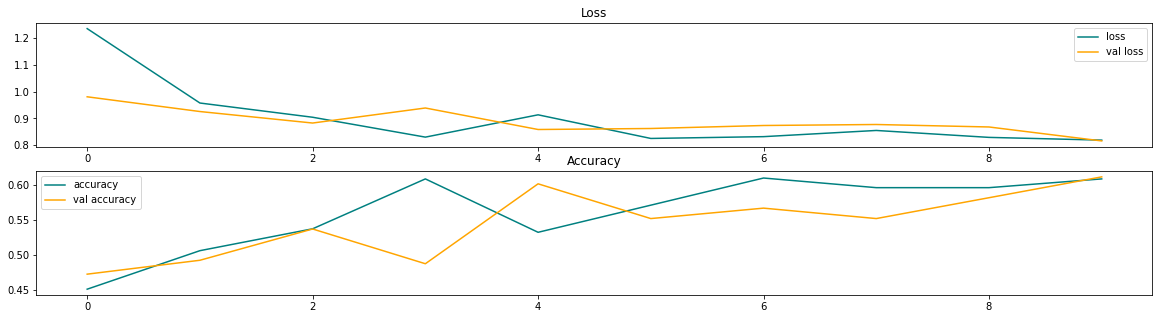

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, figsize=(20,5))

ax[0].plot(history.history['loss'], color='teal', label='loss')
ax[0].plot(history.history['val_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(history.history['accuracy'], color='teal', label='accuracy')
ax[1].plot(history.history['val_accuracy'], color='orange', label='val accuracy')
ax[1].title.set_text('Accuracy')
ax[1].legend()

plt.show()

# model evaluation

In [20]:
def model_evaluation(model, x, y):
  predict = model.predict(x)
  predict = np.argmax(predict, axis=1)
  y_label = np.argmax(y, axis=1)
  print(classification_report(y_label, predict, target_names=label))

  conf_matrix = confusion_matrix(y_label, predict)
  print(conf_matrix)
  
  df_cm = pd.DataFrame(
      conf_matrix,
      index = label,
      columns = label)
  plt.figure(figsize = (5, 5))
  sns.heatmap(df_cm, annot=True)

              precision    recall  f1-score   support

acne level 0       0.72      0.55      0.62       304
acne level 1       0.59      0.76      0.66       372
acne level 2       0.62      0.45      0.52       108

    accuracy                           0.63       784
   macro avg       0.64      0.59      0.60       784
weighted avg       0.65      0.63      0.63       784

[[166 135   3]
 [ 64 281  27]
 [  1  58  49]]


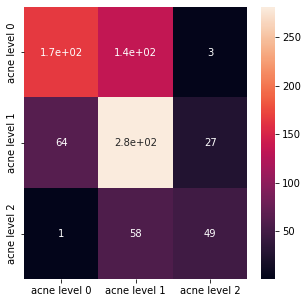

In [21]:
train_generator.reset()
x_train, y_train = train_generator.next()

for i in range(int(tf.math.ceil(train_generator.n / train_generator.batch_size) - 2)):
  x, y = train_generator.next()
  x_train = np.append(x_train, x, axis=0)
  y_train = np.append(y_train, y, axis=0)

model_evaluation(model, x_train, y_train)

              precision    recall  f1-score   support

acne level 0       0.63      0.64      0.64        73
acne level 1       0.59      0.67      0.63        92
acne level 2       0.67      0.30      0.41        27

    accuracy                           0.61       192
   macro avg       0.63      0.54      0.56       192
weighted avg       0.61      0.61      0.60       192

[[47 25  1]
 [27 62  3]
 [ 1 18  8]]


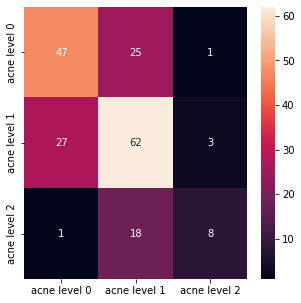

In [22]:
val_generator.reset()
x_val, y_val = val_generator.next()

for i in range(int(tf.math.ceil(val_generator.n / val_generator.batch_size) - 2)):
  x, y = val_generator.next()
  x_val = np.append(x_val, x, axis=0)
  y_val = np.append(y_val, y, axis=0)

model_evaluation(model, x_val, y_val)

# save model

In [ ]:
model.save('model')

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model('model') # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
!unzip /content/model.zip

In [ ]:
model = tf.keras.models.load_model('model')

In [ ]:
model.summary()

In [ ]:
model.save('model.h5')

In [ ]:
test = tf.keras.models.load_model('model.h5')

In [ ]:
test.summary()

In [ ]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    img = tf.image.resize(img, [150,150])
    img = tf.cast(img, tf.float32)/255.0
    img = img[np.newaxis, :, :, :]
    return img

In [ ]:
img = load_image('/content/levle1_16.jpg')

In [ ]:
result = model.predict(img)

In [ ]:
result

In [ ]:
!tensorflowjs_converter --input_format=tf_saved_model model web_model

In [ ]:
!zip -r facial_diseases.zip "/content/drive/MyDrive/product-capstone/machine-learning/DATASET/facial diseases"

In [ ]:
!tensorflowjs_converter --input_format=keras model.h5 tfjs_model